# Лабораторна робота №4
## Студента групи МІТ-31 (підгрупа 2)
## Фітя Владислава Тарасовича

# Завдання
1.  Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).

2.  Згенерувати набір даних для регресії та класифікації з використанням TensorFlow

3.  Здійснити графічний аналіз наборів даних за допомогою Matplotlib

4.  Відповіді оформити .ipynb документом

5.  Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

In [5]:
Scalar = tf.constant(19)
Vector = tf.constant([2.0, 14, 45])
Matrix = tf.constant([[13, 5], [8, 3], [19, 5], [9, 15]])
print('Scalar:' , Scalar)
print('Vector:', Vector)
print('Matrix:', Matrix)

Scalar: tf.Tensor(19, shape=(), dtype=int32)
Vector: tf.Tensor([ 2. 14. 45.], shape=(3,), dtype=float32)
Matrix: tf.Tensor(
[[13  5]
 [ 8  3]
 [19  5]
 [ 9 15]], shape=(4, 2), dtype=int32)


In [6]:
random1 = tf.random.Generator.from_seed(2) 
random1 = random1.normal(shape=(2, 5))

random2 = tf.random.Generator.from_seed(2)
random2 = random2.normal(shape=(2, 5))

In [8]:
Ones = tf.ones([3, 9])
Zeros = tf.zeros(shape=(1,2,4))
print('Ones:', Ones)
print('Zeros:', Zeros)

Ones: tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(3, 9), dtype=float32)
Zeros: tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(1, 2, 4), dtype=float32)


In [9]:
changeable_tensor = tf.Variable([5, 12])
unchangeable_tensor = tf.constant([5, 12])

changeable_tensor[0].assign(12)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([12, 12])>

In [10]:
random3 = tf.random.Generator.from_seed(2) 
random3 = random3.normal(shape=(2, 5))
print(random3)

tf.random.set_seed(13)
tf.random.shuffle(random3, seed=13)
print(random3)

tf.Tensor(
[[-0.1012345  -0.2744976   1.4204658   1.2609464  -0.43640924]
 [-1.9633987  -0.06452483 -1.056841    1.0019137   0.6735137 ]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-0.1012345  -0.2744976   1.4204658   1.2609464  -0.43640924]
 [-1.9633987  -0.06452483 -1.056841    1.0019137   0.6735137 ]], shape=(2, 5), dtype=float32)


In [14]:
rank4_tensor = tf.zeros(shape=[1, 3, 4, 5])

rank4_tensor

<tf.Tensor: shape=(1, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [16]:
rank4_tensor.shape, rank4_tensor.ndim, tf.size(rank4_tensor)
print("Number of dimensions:", rank4_tensor.ndim)
print("Total number of elements in our tensor:", tf.size(rank4_tensor).numpy())
print("Total number of elements in our tensor:", tf.size(rank4_tensor))
print("Elements along the last axis:", rank4_tensor.shape[-1])
print("Shape of tensor:", rank4_tensor.shape)
print("Datatype of every element:", rank4_tensor.dtype)
print("Elements along the 0 axis:", rank4_tensor.shape[0])

Number of dimensions: 4
Total number of elements in our tensor: 60
Total number of elements in our tensor: tf.Tensor(60, shape=(), dtype=int32)
Elements along the last axis: 5
Shape of tensor: (1, 3, 4, 5)
Datatype of every element: <dtype: 'float32'>
Elements along the 0 axis: 1


In [29]:
print(Matrix + 2, Matrix * 5, Matrix - 5)
print(tf.multiply(Matrix, 2))

tf.Tensor(
[[15  7]
 [10  5]
 [21  7]
 [11 17]], shape=(4, 2), dtype=int32) tf.Tensor(
[[65 25]
 [40 15]
 [95 25]
 [45 75]], shape=(4, 2), dtype=int32) tf.Tensor(
[[ 8  0]
 [ 3 -2]
 [14  0]
 [ 4 10]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[26 10]
 [16  6]
 [38 10]
 [18 30]], shape=(4, 2), dtype=int32)


In [30]:
def tf_delete(tensor,index,row=True):
    
    if row:
        sub = list(range(tensor.shape[0]))
    else:
        sub = list(range(tensor.shape[1]))
    sub.pop(index)
    
    if row:
        return  tf.gather(tensor,sub)
    return tf.transpose(tf.gather(tf.transpose(tensor),sub))
    

In [32]:
print(Matrix)
matrix = tf_delete(Matrix,1,row=True)
print(Matrix)
matrix = tf_delete(Matrix,1,row=False)
print(Matrix)

tf.Tensor(
[[13  5]
 [ 8  3]
 [19  5]
 [ 9 15]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[13  5]
 [ 8  3]
 [19  5]
 [ 9 15]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[13  5]
 [ 8  3]
 [19  5]
 [ 9 15]], shape=(4, 2), dtype=int32)


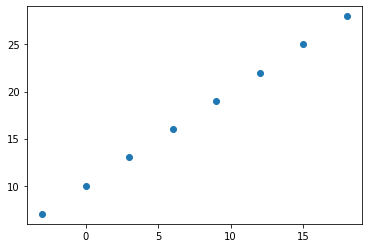

In [35]:
basic_laptop = tf.constant(["mouse", "camera", "processor", "graphic card", "charger"])
laptop_price = tf.constant([13550])
basic_laptop, laptop_price

X = np.array([-3.0, 0.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0])
y = np.array([7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0])
plt.scatter(X, y)
input_shape = X[0].shape 
output_shape = y[0].shape

In [36]:
X_train = X[:8]
y_train = y[:8]

X_test = X[0:]
y_test = y[0:]

In [39]:
tf.random.set_seed(13)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model.fit(X, y, epochs=5)
model.predict([16.0])

Epoch 1/5
1/1 [==============================] - 0s 388ms/step - loss: 14.9443 - mae: 14.9443
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 14.3718 - mae: 14.3718
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 13.7993 - mae: 13.7993
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 13.2268 - mae: 13.2268
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 12.6543 - mae: 12.6543


array([[11.5021305]], dtype=float32)

In [42]:
n_samples = 1900
X, y = make_circles(n_samples, noise=0.03, random_state=13)
X.shape, y.shape

((1900, 2), (1900,))

In [43]:
tf.random.set_seed(13)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])
model_1.fit(X, y, epochs=5)
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

Epoch 1/5
60/60 [==============================] - 0s 1ms/step - loss: 6.4965 - accuracy: 0.5074
Epoch 2/5
60/60 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
60/60 [==============================] - 0s 905us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
60/60 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
60/60 [==============================] - 0s 584us/step - loss: 7.7125 - accuracy: 0.5000


[7.712473392486572, 0.5]

Epoch 1/100
1/1 [==============================] - 1s 716ms/step - loss: 40.6914 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 40.6574 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 999us/step - loss: 40.6193 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 40.5765 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 40.5286 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 40.4748 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 40.4144 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 40.3468 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 40.2710 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 40.185

<AxesSubplot:xlabel='epochs'>

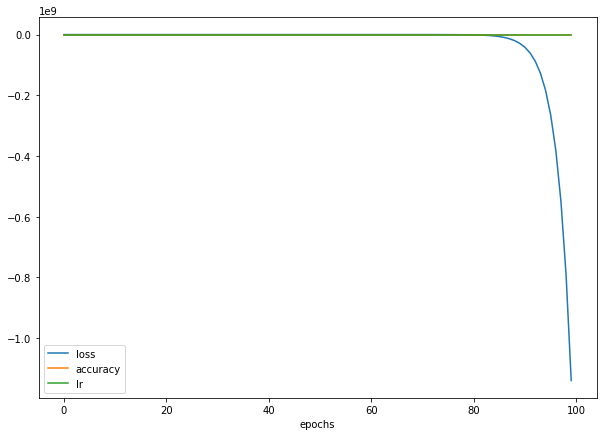

In [44]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"]) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_3.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate/Loss')

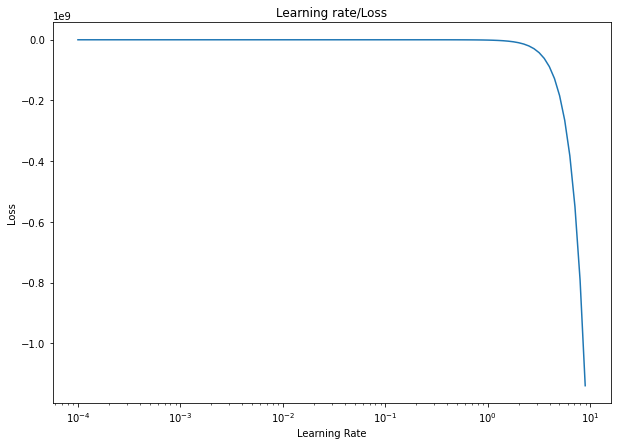

In [45]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate/Loss")

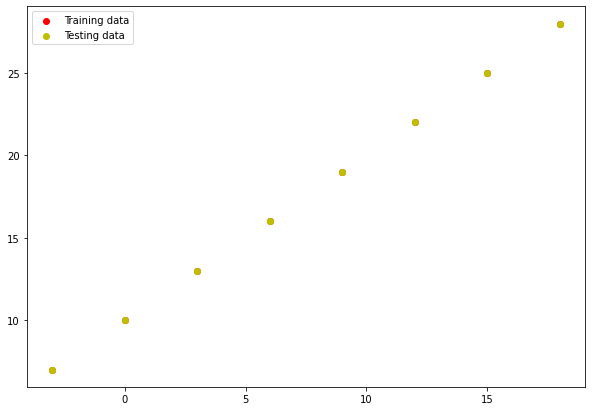

In [48]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='r', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
y_preds = model.predict(X_test)

In [50]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

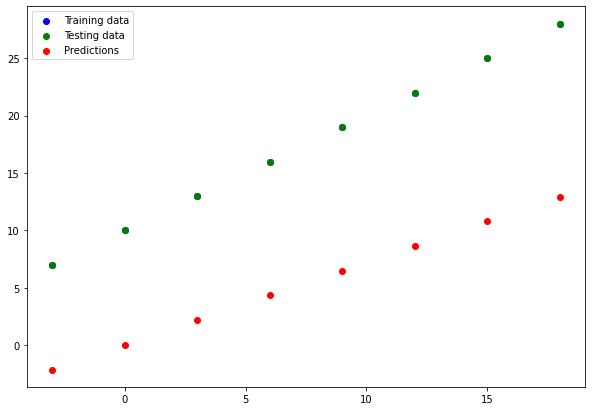

In [51]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)